## HW2 code

### Data Resources

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ff_data = pd.read_csv("/content/F-F_Research_Data_Factors_daily.CSV", skiprows=4)

ff_cleaned_data = ff_data.dropna()

# Convert the 'Unnamed: 0' column to datetime format
ff_cleaned_data['Date'] = pd.to_datetime(ff_cleaned_data['Unnamed: 0'], format='%Y%m%d')

# remove 'Unnamed: 0' column
ff_cleaned_data = ff_cleaned_data.drop(columns=['Unnamed: 0'])

# Set the index as the 'Date' for further merging
ff_cleaned_data = ff_cleaned_data.set_index('Date')

ff_cleaned_data

<ipython-input-7-36d3fe990048>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_cleaned_data['Date'] = pd.to_datetime(ff_cleaned_data['Unnamed: 0'], format='%Y%m%d')


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.10,-0.25,-0.27,0.009
1926-07-02,0.45,-0.33,-0.06,0.009
1926-07-06,0.17,0.30,-0.39,0.009
1926-07-07,0.09,-0.58,0.02,0.009
1926-07-08,0.21,-0.38,0.19,0.009
...,...,...,...,...
2024-08-26,-0.34,0.10,0.16,0.022
2024-08-27,0.06,-0.86,0.02,0.022
2024-08-28,-0.67,-0.55,1.14,0.022


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stock_data = pd.read_excel("Homework 2 data.xlsx", sheet_name="Data")
stock_data

,AAPL US Equity,AAPL US Equity Closing Price,AAPL US Equity Volume,MSFT US Equity,MSFT US Equity Closing Price,MSFT US Equity Volume,NVDA US Equity,NVDA US Equity Closing Price,NVDA US Equity Volume,GOOG US Equity,...,MA US Equity Volume,HD US Equity,HD US Equity Closing Price,HD US Equity Volume,PG US Equity,PG US Equity Closing Price,PG US Equity Volume,COST UW Equity,COST UW Equity Closing Price,COST UW Equity Volume
0,1980-12-12,NaN,469033600.0,1986-03-13,0.0972,1.031789e+09,1999-01-21,0.0250,NaN,2014-03-27,...,NaN,1981-09-22,0.035,4966186.0,1980-07-28,2.4023,1363200.0,1993-10-22,9.500,3060600.0
1,1980-12-15,NaN,175884800.0,1986-03-14,0.1007,3.081600e+08,1999-01-22,0.0410,2.714688e+09,2014-03-28,...,395343000.0,1981-09-23,0.035,4920396.0,1980-07-29,2.4492,1504000.0,1993-10-25,9.750,2370800.0
2,1980-12-16,NaN,105728000.0,1986-03-17,0.1024,1.331712e+08,1999-01-25,0.0453,5.104800e+08,2014-03-31,...,103044000.0,1981-09-24,0.035,3416837.0,1980-07-30,2.5000,2073600.0,1993-10-26,9.438,3016600.0
3,1980-12-17,NaN,86441600.0,1986-03-18,0.0998,6.647040e+07,1999-01-26,0.0418,3.432000e+08,2014-04-01,...,49898000.0,1981-09-25,0.035,4897843.0,1980-07-31,2.5156,1292800.0,1993-10-27,9.125,2513200.0
4,1980-12-18,NaN,73449600.0,1986-03-19,0.0981,4.789440e+07,1999-01-27,0.0417,2.443680e+08,2014-04-02,...,30002000.0,1981-09-28,0.035,3872689.0,1980-08-01,2.4805,2147200.0,1993-10-28,9.250,2174800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11281,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
11282,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
11283,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
11284,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN


In [ ]:
pd.set_option('display.max_columns', 100)
stock_data.head(200)

,AAPL US Equity,AAPL US Equity Closing Price,AAPL US Equity Volume,MSFT US Equity,MSFT US Equity Closing Price,MSFT US Equity Volume,NVDA US Equity,NVDA US Equity Closing Price,NVDA US Equity Volume,GOOG US Equity,GOOG US Equity Closing Price,GOOG US Equity Volume,AMZN US Equity,AMZN US Equity Closing Price,AMZN US Equity Volume,META US Equity,META US Equity Closing Price,META US Equity Volume,BRK/B US Equity,BRK/B US Equity Closing Price,BRK/B US Equity Volume,LLY US Equity,LLY US Equity Closing Price,LLY US Equity Volume,AVGO US Equity,AVGO US Equity Closing Price,AVGO US Equity Volume,TSLA US Equity,TSLA US Equity Closing Price,TSLA US Equity Volume,WMT US Equity,WMT US Equity Closing Price,WMT US Equity Volume,JPM US Equity,JPM US Equity Closing Price,JPM US Equity Volume,V US Equity,V US Equity Closing Price,V US Equity Volume,UNH US Equity,UNH US Equity Closing Price,UNH US Equity Volume,XOM US Equity,XOM US Equity Closing Price,XOM US Equity Volume,ORCL US Equity,ORCL US Equity Closing Price,ORCL US Equity Volume,MA US Equity,MA US Equity Closing Price,MA US Equity Volume,HD US Equity,HD US Equity Closing Price,HD US Equity Volume,PG US Equity,PG US Equity Closing Price,PG US Equity Volume,COST UW Equity,COST UW Equity Closing Price,COST UW Equity Volume
0,1980-12-12,NaN,469033600.0,1986-03-13,0.0972,1.031789e+09,1999-01-21,0.0250,NaN,2014-03-27,27.847,261757.0,1997-05-14,0.075,NaN,2012-05-17,38.000,NaN,1996-05-09,23.20,4282000.0,1980-07-28,3.3203,2408000.0,2009-08-05,1.500,NaN,2010-06-28,1.1333,NaN,1980-01-02,0.0436,825753600,1980-07-28,6.1481,551475.0,2008-03-18,11.0000,NaN,1984-10-17,NaN,9868800.0,1980-07-28,4.4688,3128000.0,1986-03-13,NaN,125323200.0,2006-05-24,3.900,NaN,1981-09-22,0.035,4966186.0,1980-07-28,2.4023,1363200.0,1993-10-22,9.500,3060600.0
1,1980-12-15,NaN,175884800.0,1986-03-14,0.1007,3.081600e+08,1999-01-22,0.0410,2.714688e+09,2014-03-28,27.923,822312.0,1997-05-15,0.098,1.443120e+09,2012-05-18,38.232,582457765.0,1996-05-10,24.00,1061500.0,1980-07-29,3.3125,2929600.0,2009-08-06,1.618,241984090.0,2010-06-29,1.5927,281749140.0,1980-01-03,0.0431,1848115200,1980-07-29,6.1852,542025.0,2008-03-19,14.1250,708485888.0,1984-10-18,NaN,5324800.0,1980-07-29,4.5078,3524800.0,1986-03-14,NaN,57898800.0,2006-05-25,4.600,395343000.0,1981-09-23,0.035,4920396.0,1980-07-29,2.4492,1504000.0,1993-10-25,9.750,2370800.0
2,1980-12-16,NaN,105728000.0,1986-03-17,0.1024,1.331712e+08,1999-01-25,0.0453,5.104800e+08,2014-03-31,27.772,216032.0,1997-05-16,0.086,2.940000e+08,2012-05-21,34.030,168309831.0,1996-05-13,23.90,702000.0,1980-07-30,3.3672,2057600.0,2009-08-07,1.643,24542720.0,2010-06-30,1.5887,257915910.0,1980-01-04,0.0441,1101004800,1980-07-30,6.2037,112725.0,2008-03-20,16.0875,198984944.0,1984-10-19,NaN,3043200.0,1980-07-30,4.4141,6900800.0,1986-03-17,NaN,28317600.0,2006-05-26,4.493,103044000.0,1981-09-24,0.035,3416837.0,1980-07-30,2.5000,2073600.0,1993-10-26,9.438,3016600.0
3,1980-12-17,NaN,86441600.0,1986-03-18,0.0998,6.647040e+07,1999-01-26,0.0418,3.432000e+08,2014-04-01,28.280,159076.0,1997-05-19,0.085,1.221360e+08,2012-05-22,31.000,102053826.0,1996-05-14,23.60,311500.0,1980-07-31,3.3984,1244800.0,2009-08-10,1.597,24209150.0,2010-07-01,1.4640,123447945.0,1980-01-07,0.0439,491520000,1980-07-31,6.2037,820800.0,2008-03-24,14.9325,149694984.0,1984-10-22,NaN,2326400.0,1980-07-31,4.3516,11129600.0,1986-03-18,NaN,32367600.0,2006-05-30,4.400,49898000.0,1981-09-25,0.035,4897843.0,1980-07-31,2.5156,1292800.0,1993-10-27,9.125,2513200.0
4,1980-12-18,NaN,73449600.0,1986-03-19,0.0981,4.789440e+07,1999-01-27,0.0417,2.443680e+08,2014-04-02,28.272,2941997.0,1997-05-20,0.082,1.093440e+08,2012-05-23,32.000,73721135.0,1996-05-15,23.20,542500.0,1980-08-01,3.3828,2771200.0,2009-08-11,1.567,23053710.0,2010-07-02,1.2800,77127105.0,1980-01-08,0.0448,2359296000,1980-08-01,6.1481,1198800.0,2008-03-25,15.8125,87165192.0,1984-10-23,NaN,787200.0,1980-08-01,4.3984,8112000.0,1986-03-19,NaN,22744800.0,2006-05-31,4.494,30002000.0,1981-09-28,0.035,3872689.

### 1. Select 10 stocks from the top 20 companies in the S&P 500 by market cap, and compute the traditional CAPM and Fama-French (FF) 3-Factor CAPM coefficients.


1. Use percent returns, not log returns.
2. Describe the relevance of Beta for each company from each model


In [ ]:
stock_data.columns

Index(['AAPL US Equity', 'AAPL US Equity Closing Price',
       'AAPL US Equity Volume', 'MSFT US Equity',
       'MSFT US Equity Closing Price', 'MSFT US Equity Volume',
       'NVDA US Equity', 'NVDA US Equity Closing Price',
       'NVDA US Equity Volume', 'GOOG US Equity',
       'GOOG US Equity Closing Price', 'GOOG US Equity Volume',
       'AMZN US Equity', 'AMZN US Equity Closing Price',
       'AMZN US Equity Volume', 'META US Equity',
       'META US Equity Closing Price', 'META US Equity Volume',
       'BRK/B US Equity', 'BRK/B US Equity Closing Price',
       'BRK/B US Equity Volume', 'LLY US Equity',
       'LLY US Equity Closing Price', 'LLY US Equity Volume', 'AVGO US Equity',
       'AVGO US Equity Closing Price', 'AVGO US Equity Volume',
       'TSLA US Equity', 'TSLA US Equity Closing Price',
       'TSLA US Equity Volume', 'WMT US Equity', 'WMT US Equity Closing Price',
       'WMT US Equity Volume', 'JPM US Equity', 'JPM US Equity Closing Price',
       'JPM US Equ

In [ ]:
# columns of the date and the corresponding price for selected 10 stocks
stock_columns = {
    'AAPL': ['AAPL US Equity', 'AAPL US Equity Closing Price'],
    'MSFT': ['MSFT US Equity', 'MSFT US Equity Closing Price'],
    'NVDA': ['NVDA US Equity', 'NVDA US Equity Closing Price'],
    'GOOG': ['GOOG US Equity', 'GOOG US Equity Closing Price'],
    'MA': ['MA US Equity', 'MA US Equity Closing Price'],
    'HD': ['HD US Equity', 'HD US Equity Closing Price'],
    'PG': ['PG US Equity', 'PG US Equity Closing Price'],
    'COST': ['COST UW Equity', 'COST UW Equity Closing Price'],
    'JPM': ['JPM US Equity', 'JPM US Equity Closing Price'],
    'V': ['V US Equity', 'V US Equity Closing Price']
}

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np


# Dictionary to store regression results
regression_results = {}

# clean the stock data, calculate pct returns and merge with ff data
for stock, cols in stock_columns.items():
    date_col, price_col = cols

    # extract date and closing price for the stock
    stock_df = stock_data[[date_col, price_col]].dropna()

    # convert date column to datetime
    stock_df[date_col] = pd.to_datetime(stock_df[date_col])

    # set date as index
    stock_df = stock_df.set_index(date_col)

    # calculate percent returns
    stock_returns = stock_df.pct_change().dropna() * 100
    rename_col = stock + ' ' + 'US Equity Percent Returns'
    stock_returns.columns = [rename_col]

    # align stock returns with Fama-French data by date
    stock_returns.index = pd.to_datetime(stock_returns.index)

    # merge stock returns with Fama-French data on the date index
    merged_data = stock_returns.merge(ff_cleaned_data, left_index=True, right_index=True)

    # Subtract risk-free rate to get excess returns
    excess_returns = merged_data[rename_col] - merged_data['RF']

    # Prepare data for regression (X and y)
    X_capm = merged_data[['Mkt-RF']].values  # CAPM uses only market excess return
    X_ff3 = merged_data[['Mkt-RF', 'SMB', 'HML']].values  # FF3 uses market, size, and value factors
    y = excess_returns.values.reshape(-1, 1)

    # CAPM: Linear regression on Mkt-RF
    capm_model = LinearRegression().fit(X_capm, y)

    # Fama-French 3-Factor: Linear regression on Mkt-RF, SMB, HML
    ff3_model = LinearRegression().fit(X_ff3, y)

    # Store the results for CAPM and FF3
    regression_results[stock] = {
        'CAPM': capm_model,
        'FF3': ff3_model
    }


# Extract coefficients (Betas) for each stock and display them
for stock, models in regression_results.items():
    print(f"{stock} CAPM Coefficients:\nIntercept (Alpha): {models['CAPM'].intercept_[0]:.3f}\n"
          f"Beta (Mkt-RF): {models['CAPM'].coef_[0][0]:.3f}\n")

    print(f"{stock} Fama-French 3-Factor Coefficients:\nIntercept (Alpha): {models['FF3'].intercept_[0]:.3f}\n"
          f"Beta (Mkt-RF): {models['FF3'].coef_[0][0]:.3f}\n"
          f"Beta (SMB): {models['FF3'].coef_[0][1]:.3f}\n"
          f"Beta (HML): {models['FF3'].coef_[0][2]:.3f}\n")

    print("-" * 50)


AAPL CAPM Coefficients:
Intercept (Alpha): 0.050
Beta (Mkt-RF): 1.233

AAPL Fama-French 3-Factor Coefficients:
Intercept (Alpha): 0.059
Beta (Mkt-RF): 1.193
Beta (SMB): -0.049
Beta (HML): -0.650

--------------------------------------------------
MSFT CAPM Coefficients:
Intercept (Alpha): 0.055
Beta (Mkt-RF): 1.190

MSFT Fama-French 3-Factor Coefficients:
Intercept (Alpha): 0.060
Beta (Mkt-RF): 1.156
Beta (SMB): -0.301
Beta (HML): -0.612

--------------------------------------------------
NVDA CAPM Coefficients:
Intercept (Alpha): 0.144
Beta (Mkt-RF): 1.661

NVDA Fama-French 3-Factor Coefficients:
Intercept (Alpha): 0.147
Beta (Mkt-RF): 1.632
Beta (SMB): 0.507
Beta (HML): -0.863

--------------------------------------------------
GOOG CAPM Coefficients:
Intercept (Alpha): 0.023
Beta (Mkt-RF): 1.114

GOOG Fama-French 3-Factor Coefficients:
Intercept (Alpha): 0.017
Beta (Mkt-RF): 1.125
Beta (SMB): -0.261
Beta (HML): -0.415

--------------------------------------------------
MA CAPM Coeff

### 2. Devise some non-cluttered way to report the coefficients and the significance, perhaps by quoting the t-statistics.

In [ ]:
from statsmodels.api import OLS, add_constant


# Dictionary to store rounded t-statistics and coefficients
regression_results_with_tstats = {}

# Loop through the stocks to calculate coefficients and t-statistics
for stock, cols in stock_columns.items():
    date_col, price_col = cols

    # Extract date and closing price for the stock
    stock_df = stock_data[[date_col, price_col]].dropna()
    stock_df[date_col] = pd.to_datetime(stock_df[date_col])
    stock_df = stock_df.set_index(date_col)

    # Calculate percent returns
    stock_returns = stock_df.pct_change().dropna() * 100
    rename_col = stock + ' Percent Returns'
    stock_returns.columns = [rename_col]

    # Merge stock returns with Fama-French data
    merged_data = stock_returns.merge(ff_cleaned_data, left_index=True, right_index=True)

    # Calculate excess returns
    excess_returns = merged_data[rename_col] - merged_data['RF']

    # Prepare data for CAPM (Mkt-RF) and FF3 (Mkt-RF, SMB, HML)
    X_capm = merged_data[['Mkt-RF']].values
    X_ff3 = merged_data[['Mkt-RF', 'SMB', 'HML']].values
    y = excess_returns.values.reshape(-1, 1)

    # CAPM: OLS to get coefficients and t-statistics
    capm_model = OLS(y, add_constant(X_capm)).fit()
    capm_tstats = np.round(capm_model.tvalues, 3)

    # Fama-French 3-Factor: OLS to get coefficients and t-statistics
    ff3_model = OLS(y, add_constant(X_ff3)).fit()
    ff3_tstats = np.round(ff3_model.tvalues, 3)

    # Store coefficients and t-statistics
    regression_results_with_tstats[stock] = {
        'CAPM Coefficients': np.round(capm_model.params, 3),
        'CAPM t-Statistics': capm_tstats,
        'FF3 Coefficients': np.round(ff3_model.params, 3),
        'FF3 t-Statistics': ff3_tstats
    }


# Extract coefficients and t-statistics for display
for stock, results in regression_results_with_tstats.items():
    print(f"{stock} CAPM Coefficients:\n{results['CAPM Coefficients']}\n"
          f"CAPM t-Statistics:\n{results['CAPM t-Statistics']}\n")
    print(f"{stock} FF3 Coefficients:\n{results['FF3 Coefficients']}\n"
          f"FF3 t-Statistics:\n{results['FF3 t-Statistics']}\n")
    print("-" * 50)


AAPL CAPM Coefficients:
[0.05  1.233]
CAPM t-Statistics:
[ 2.156 58.864]

AAPL FF3 Coefficients:
[ 0.059  1.193 -0.049 -0.65 ]
FF3 t-Statistics:
[  2.548  57.499  -1.291 -18.535]

--------------------------------------------------
MSFT CAPM Coefficients:
[0.055 1.19 ]
CAPM t-Statistics:
[ 3.321 82.718]

MSFT FF3 Coefficients:
[ 0.06   1.156 -0.301 -0.612]
FF3 t-Statistics:
[  3.799  83.2   -11.759 -26.049]

--------------------------------------------------
NVDA CAPM Coefficients:
[0.144 1.661]
CAPM t-Statistics:
[ 3.524 50.322]

NVDA FF3 Coefficients:
[ 0.147  1.632  0.507 -0.863]
FF3 t-Statistics:
[  3.689  50.501   8.133 -16.925]

--------------------------------------------------
GOOG CAPM Coefficients:
[0.023 1.114]
CAPM t-Statistics:
[ 0.971 52.475]

GOOG FF3 Coefficients:
[ 0.017  1.125 -0.261 -0.415]
FF3 t-Statistics:
[  0.754  54.669  -7.314 -15.926]

--------------------------------------------------
MA CAPM Coefficients:
[0.073 1.127]
CAPM t-Statistics:
[ 3.195 62.154]

MA F

### 3. For the stock of your choosing from the top 20 companies in the S&P 500 by market cap obtain and plot a year rolling beta from 2000-present). That is, on each day regress the previous 252 trade days to calculate your betas over time.

In [ ]:
stock = 'NVDA' # choose stock

def process_stock_data(stock):

  stock_chosen = f'{stock} US Equity Closing Price' if stock != 'COST' else 'COST UW Equity Closing Price'
  stock_symbol = f'{stock} US Equity' if stock != 'COST' else 'COST UW Equity'

  chosen_stock_data = stock_data[[stock_symbol, stock_chosen]].copy()

  chosen_stock_data.columns = ['Date', f'{stock} Price']
  ## merge with FF factors
  chosen_stock_data = chosen_stock_data.merge(ff_cleaned_data, how = 'left', on = 'Date')

  ## filter data after 2000
  chosen_stock_data = chosen_stock_data[chosen_stock_data['Date'] >'2000-01-01']

  chosen_stock_data[f'{stock} Return'] = chosen_stock_data[f'{stock} Price'].pct_change()*100

  ## calculate excess returm
  chosen_stock_data[f'{stock} Excess Return'] = chosen_stock_data[f'{stock} Return'] - chosen_stock_data['RF'] # is this supposed to be *100?
  chosen_stock_data.dropna(inplace=True)

  return chosen_stock_data

chosen_stock_data = process_stock_data(stock)
chosen_stock_data

<ipython-input-15-874c50c28858>:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  chosen_stock_data[f'{stock} Return'] = chosen_stock_data[f'{stock} Price'].pct_change()*100


,Date,NVDA Price,Mkt-RF,SMB,HML,RF,NVDA Return,NVDA Excess Return
241,2000-01-04,0.0949,-4.06,0.00,2.06,0.021,-2.666667,-2.687667
242,2000-01-05,0.0918,-0.09,0.20,0.16,0.021,-3.266596,-3.287596
243,2000-01-06,0.0858,-0.73,-0.43,1.26,0.021,-6.535948,-6.556948
244,2000-01-07,0.0872,3.21,-0.48,-1.42,0.021,1.631702,1.610702
245,2000-01-10,0.0901,1.76,0.96,-1.52,0.021,3.325688,3.304688
...,...,...,...,...,...,...,...,...
6441,2024-08-26,126.4600,-0.34,0.10,0.16,0.022,-2.249362,-2.271362
6442,2024-08-27,128.3000,0.06,-0.86,0.02,0.022,1.455006,1.433006
6443,2024-08-28,125.6100,-0.67,-0.55,1.14,0.022,-2.096648,-2.118648
6444,2024-08-29,117.5900,0.08,0.38,0.28,0.022,-6.384842,-6.406842


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
def rolling_regression_FF3(df, stock, window=252):
  ## make beta dictionary
  betas = {
      'Beta_Mkt': [],
      'Beta_SMB': [],
      'Beta_HML': [],
      'Date' : [],
      }

  lin_reg = LinearRegression()

  # make FF3F model for each 252 window after year 2000
  for i in range(len(df) - window):
    window_data = df.iloc[i:i+window]
    X = window_data[['Mkt-RF', 'SMB', 'HML']]
    y = window_data[f'{stock} Excess Return']
    lin_reg.fit(X, y)
    ## append coefficients to dictionary
    betas['Beta_Mkt'].append(lin_reg.coef_[0])
    betas['Beta_SMB'].append(lin_reg.coef_[1])
    betas['Beta_HML'].append(lin_reg.coef_[2])
    betas['Date'].append(df.iloc[i+window]['Date'])
  return betas


rolling_betas = rolling_regression_FF3(chosen_stock_data, stock = stock)

betas_df = pd.DataFrame(rolling_betas)


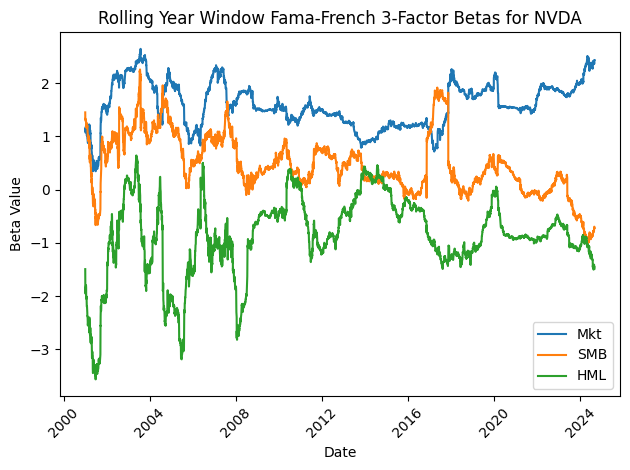

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=betas_df, x='Date', y='Beta_Mkt', label='Mkt')
sns.lineplot(data=betas_df, x='Date', y='Beta_SMB', label='SMB')
sns.lineplot(data=betas_df, x='Date', y='Beta_HML', label='HML')

# Add the legend automatically based on the labels
plt.legend()

# Add title and labels
plt.title(f'Rolling Year Window Fama-French 3-Factor Betas for {stock}')
plt.xlabel('Date')
plt.ylabel('Beta Value')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

Nvidia's $\beta_{\text{Mkt}}$ value tends to hover between 1 and 2, suggesting it is a more agressive stock relative to the market. It's sensitivity to the size factor $\beta_{\text{SMB}}$, typically falls between 0 and 1, suggesting there is a smaller, positive relationship between the difference in performance of small and large cap firms. Meanwhile, the $\beta_{\text{HML}}$ is typically negative, suggesting the size factor and Nvidia returns typically move in opposite directions. However, it is important to note that $\beta_{\text{HML}}$ was previously much more volatile from 2000-2010 but has since become more steady, typically staying around -1.

### 4. Summarize how the FF factors are derived and maintained.

The Fama French 3 Factor model can be written as follows:

$$ \begin{equation}
    R_i - R_f = \alpha_i + \beta_{\text{Mkt}}(R_{\text{Mkt}} - R_f) + \beta_{\text{SMB}} \cdot \text{SMB} + \beta_{\text{HML}} \cdot \text{HML} + \epsilon_i
\end{equation}
$$



Where:
- $R_i$ is the return of stock i,
- $R_f$ is the risk-free rate,
- $R_M$ is the market return,
- $\alpha_i$ is the intercept, or stock-specific alpha,
- $\beta_{iM}$ is the sensitivity to the market risk premium,
- $\beta_{iSMB}$ is the sensitivity to the size factor (**SMB**),
- $\beta_{iHML}$ is the sensitivity to the value factor (**HML**),
- $\epsilon_i$ is the error term.

The factors:
- **Market Risk Premium**: \($R_M - R_f$) represents the excess return of the market over the risk-free rate.
- **SMB (Small Minus Big)**: Captures the size effect (small-cap stocks tend to outperform large-cap stocks).
- **HML (High Minus Low)**: Captures the value effect (value stocks tend to outperform growth stocks).

### Derivations and Maintenance

1. **Market Risk Premium (Mkt-RF)**
- Derivation: This is the excess return of the overall stock market over the risk-free rate.
- Market Return is usually represented by a broad market index like the S&P 500 or CRSP total market index, which includes all listed U.S. stocks.
- Risk-Free Rate typically comes from short-term U.S. Treasury bills (often the 1-month or 3-month T-bill rate).
The market risk premium measures the additional return an investor earns by investing in the stock market over a risk-free asset.

2. **Small Minus Big (SMB) - Size Factor**
- Derivation: SMB captures the size effect, where historically, small-cap stocks (small companies) tend to outperform large-cap stocks (large companies). To derive SMB, stocks are sorted by market capitalization and divided into small and large categories.

Steps for calculation:
- Rank all stocks in the market based on their market capitalization at the start of the period.
- Divide stocks into small (bottom 50% by market cap) and large (top 50% by market cap).
SMB is the difference in the average returns of the small-cap stock portfolio minus the large-cap stock portfolio:
$$ SMB = \frac{1}{3} \left( \text{Small-Value} + \text{Small-Neutral} + \text{Small-Growth} \right) - \frac{1}{3} \left( \text{Big-Value} + \text{Big-Neutral} + \text{Big-Growth} \right) $$
- Maintenance: SMB is updated periodically (often monthly) to reflect changes in the size classifications of stocks, based on market capitalizations. Stocks can shift from large to small and vice versa as their market capitalizations change over time.
3. *High Minus Low (HML) - Value Factor*
- Derivation: HML captures the value effect, where value stocks (companies with high book-to-market ratios) tend to outperform growth stocks (companies with low book-to-market ratios). To derive HML, stocks are sorted based on their book-to-market (B/M) ratio, which is:

$$
\text{Book-to-Market} = \frac{\text{Market Value of Equity}}{\text{Book Value of Equity}}
$$

**Steps for calculation:**
- Rank stocks based on their book-to-market ratio.
- Divide stocks into value (top 30% of book-to-market ratios) and growth (bottom 30% of book-to-market ratios).
- HML is the difference between the returns of high book-to-market stocks (value) and low book-to-market stocks (growth):

$$
HML = \frac{1}{2} \left( \text{Small-Value} + \text{Big-Value} \right) - \frac{1}{2} \left( \text{Small-Growth} + \text{Big-Growth} \right)
$$

**Maintenance:**
- HML is updated monthly as companies’ book values and market values change.
- Stocks move between value and growth categories based on shifts in their book-to-market ratios.

Sources:
- https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_factors.html
- https://www.investopedia.com/terms/f/famaandfrenchthreefactormodel.asp

### 5. Make some assessment of the regression assumption in both the CAPM and 3-Factor models.

**1. Linearity**\
**CAPM**: Assumes a linear relationship between the excess return of an asset (or portfolio) and the excess return of the market portfolio.\
**3-Factor Model**: Assumes a linear relationship between excess returns and three factors: the market excess return, the size factor (SMB – small minus big), and the value factor (HML – high minus low).\
**Assessment**: Both models generally satisfy linearity well in real time, as stock returns tend to exhibit linear relationships with these factors. However, for some stocks, especially those in highly volatile markets, linearity may not perfectly hold.

**2. Homoscedasticity**\
Homoscedasticity assumes constant variance of the residuals (the error terms) across all levels of the independent variables.\
**CAPM**: Assumes that the error terms (the difference between the predicted and actual returns) have constant variance across all levels of market returns.\
**3-Factor Model**: Assumes homoscedasticity across the three factors.\
**Assessment**: In reality, financial time series often exhibit heteroscedasticity, especially during periods of market volatility, which violates this assumption. Autoregressive conditional heteroscedasticity (ARCH) models or generalized versions (GARCH) are sometimes applied to address this issue.

**3. Independence of Errors**\
CAPM & 3-Factor Model: Both models assume that the error terms are uncorrelated (i.e., no autocorrelation).\
**Assessment**:In stock return data, this assumption is often violated. Autocorrelation can exist, especially when modeling high-frequency data, leading to biased or inefficient estimates. Time-series models may be needed to correct for this.

**4. Normality of Errors**\
CAPM & 3-Factor Model: The models assume that the residuals (errors) follow a normal distribution.\
**Assessment**:Stock returns, particularly over shorter time periods, tend to exhibit fat tails and skewness, which implies that the error terms are not normally distributed. This violation affects hypothesis testing and confidence intervals, but it’s less critical for parameter estimation.

**5. No Multicollinearity**\
**CAPM**: This model only has one independent variable (market return), so multicollinearity is not a concern.\
**3-Factor Model**: Since this model involves three factors, multicollinearity can be an issue if the factors are highly correlated with each other.\
**Assessment**: Multicollinearity is generally not a severe issue in the 3-Factor Model because the factors (market excess return, SMB, and HML) are designed to capture different dimensions of stock returns. However, if additional factors are included in expanded models (e.g., 5-Factor Model), multicollinearity risks increase.

**6. Exogeneity**\
CAPM & 3-Factor Model: Both models assume that the independent variables (market return, SMB, HML) are not correlated with the error terms (i.e., they are exogenous).\
**Assessment:** This assumption generally holds as the factors used are based on external information about the market and portfolios, though endogeneity issues may arise if there is feedback from asset returns to the factors themselves.

### 6. Describe a method to modernize the Fama French Model and Implement this model.
1. Describe your analysis and the results.

As the market has evolved, more factors are added to better capture modern financial dynamics. A common approch to modernize the Fama French Model is to add two more factors to make it Fama-French 5-Factor Model. The added factors are:
1. profitbility: Robust minus Weak (RMW), which compares the returns of firms with robust profitability to those with weak profitability.
2. Investment: Conservative minus Aggressive (CMA), which compares the returns of firms are conservative to those with aggressive.\
$$
R_i - R_f = \alpha + \beta_m (R_m - R_f) + \beta_{SMB} \cdot SMB + \beta_{HML} \cdot HML + \beta_{RMW} \cdot RMW + \beta_{CMA} \cdot CMA + \epsilon
$$

Where:

- $R_i$ is the return of the asset/portfolio $i$,
- $R_f$ is the risk-free rate,
- $R_m$ is the return of the market portfolio,
- $SMB$ is the size factor (Small minus Big),
- $HML$ is the value factor (High minus Low),
- $RMW$ is the profitability factor (Robust minus Weak),
- $CMA$ is the investment factor (Conservative minus Aggressive),
- $\beta$ 's represent the sensitivities of the stock returns to these factors, and
- $\epsilon$ is the error term.




In [ ]:
import pandas as pd
import statsmodels.api as sm

ff_factors_url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_daily_CSV.zip'
ff_factors = pd.read_csv(ff_factors_url, skiprows=3)

# Step 1: Clean up the data
ff_factors.columns = ['Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']
ff_factors['Date'] = pd.to_datetime(ff_factors['Date'], format='%Y%m%d')  # Convert 'Date' column to datetime
# Assuming stock_data has been loaded as shown in your screenshot
# Calculate daily returns for META as an example
stock_data['META_Returns'] = stock_data['META US Equity Closing Price'].pct_change()

# Remove any rows with missing values (for simplicity)
stock_data = stock_data.dropna(subset=['META_Returns'])
# Align the dates and merge the data
stock_data['Date'] = pd.to_datetime(stock_data['META US Equity'])
merged_data = pd.merge(stock_data, ff_factors, on='Date')

# Calculate excess returns (META returns - risk-free rate)
merged_data['Excess_Returns'] = merged_data['META_Returns'] - merged_data['RF'] / 100

# Set up the independent variables (factors) and dependent variable (Excess Returns)
X = merged_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
y = merged_data['Excess_Returns']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Run the regression
model = sm.OLS(y, X).fit()

# Print the summary of the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Excess_Returns   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     326.5
Date:                Thu, 10 Oct 2024   Prob (F-statistic):          2.75e-281
Time:                        04:53:33   Log-Likelihood:                 7636.2
No. Observations:                3091   AIC:                        -1.526e+04
Df Residuals:                    3085   BIC:                        -1.522e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.320      0.1

<ipython-input-18-dcc4b45360a6>:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_data['META_Returns'] = stock_data['META US Equity Closing Price'].pct_change()
<ipython-input-18-dcc4b45360a6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['META US Equity'])


We chosed daily returns for META as an example\
The R-squared number is 0.346 which means that approximately 34.6% dependent variables are explained by the five factors (independent variables).\
The F-statistic tests whether at least one of the predictors' coefficients is different from zero. The F-statistics with p-value = 0 means that the model as a whole is statistically significant.\
The p-value of Mkt-RF is 0 which is much smaller than 0.05, means that the coefficent of Mkt-RF is statistically significant. Also, the positive and significant coefficient indicates that the stock's return has a strong and positive correlation with the market returns. For every 1% increase in the market excess return, the stock’s excess return increases by 1.11%.

The p-value of SMB is 0.004 which is much smaller than 0.05, means that the coefficent of SMB is statistically significant. Also, a negative coefficient for SMB suggests that the stock is more aligned with larger-cap stocks rather than small-cap stocks.

The p-value of HML is 0 which is much smaller than 0.05, means that the coefficent of HML is statistically significant. Also, the negative coefficient indicates that the stock has a growth orientation, rather than a value orientation.

The p-value of RMW is 0.507 which is much larger than 0.05, means that the coefficent of RMW is not statistically significant. Also, the stock has little to no relationship with the firms with robust profitability to those with weak profitability.

The p-value of CMA is 0 which is much smaller than 0.05, means that the coefficent of CMA is statistically significant. Also, a negative coefficient for CMA suggests that the stock is more aligned with aggresive investment, rather than conservative investment.


### 7. Use the top 10 companies in the S&P 500 by market cap to calculate the efficient frontier and find and label the tangent portfolio.
1. Give the optimal weights and describe which risk-free rate you used and why.

As seen in class, to calculate portfolio expected return based on Modern Portfolio Theory, we have the following equation:

$$
E(R_p) = \sum \omega_iE(R_i)
$$

Where:
$$w_i$$ are the weights,
$$ E(R_i) $$ are the expected returns,
and the subindex $$i$$ represents each unique asset on the portfolio


In [ ]:
stock_list = [
    'AAPL', 'MSFT', 'NVDA', 'GOOG', 'AMZN', 'META', 'BRK/B', 'LLY',
    'AVGO', 'TSLA'
]

In [ ]:
## I had to redefine this to handle the 'COST UW ...' instead of 'COST US ...'

def process_stock_data(stock):

  stock_chosen = f'{stock} US Equity Closing Price' if stock != 'COST' else 'COST UW Equity Closing Price'
  stock_symbol = f'{stock} US Equity' if stock != 'COST' else 'COST UW Equity'

  chosen_stock_data = stock_data[[stock_symbol, stock_chosen]].copy()

  chosen_stock_data.columns = ['Date', f'{stock} Price']
  ## merge with FF factors
  chosen_stock_data = chosen_stock_data.merge(ff_cleaned_data, how = 'left', on = 'Date')

  ## filter data after 2000
  chosen_stock_data = chosen_stock_data[chosen_stock_data['Date'] >'2000-01-01']

  chosen_stock_data[f'{stock} Return'] = chosen_stock_data[f'{stock} Price'].pct_change()*100

  ## calculate excess returm
  chosen_stock_data[f'{stock} Excess Return'] = chosen_stock_data[f'{stock} Return'] - chosen_stock_data['RF'] # is this supposed to be *100?
  chosen_stock_data.dropna(inplace=True)
  return chosen_stock_data

In [ ]:
def get_stock_returns(window=252):
  '''
  Returns a DataFrame of all 20 stock returns
  '''
  excess_returns_df = pd.DataFrame()

  for stock in stock_list:
      stock_data_processed = process_stock_data(stock)[-window:]

      stock_excess_returns = stock_data_processed[['Date', f'{stock} Excess Return']].copy()
      stock_excess_returns.set_index('Date', inplace=True)

      stock_excess_returns = stock_excess_returns.rename(columns={f'{stock} Excess Return': stock})


      if excess_returns_df.empty:
          excess_returns_df = stock_excess_returns
      else:
          excess_returns_df = excess_returns_df.join(stock_excess_returns, how='outer')

  return excess_returns_df


In [ ]:
def get_portfolio_return(weights: np.array, asset_returns: np.array) -> float:
  '''
  Returns EV of a portfolio, given EV of assets and weights
  '''
  return weights.T @ asset_returns

In [ ]:
def get_weights(n = 10):
  '''
  Returns n (default=10) random numbers that sum to 1
  '''
  weights = np.random.rand(n)
  weights /= np.sum(weights)
  return weights

<ipython-input-36-c96001ec765f>:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  chosen_stock_data[f'{stock} Return'] = chosen_stock_data[f'{stock} Price'].pct_change()*100
<ipython-input-36-c96001ec765f>:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  chosen_stock_data[f'{stock} Return'] = chosen_stock_data[f'{stock} Price'].pct_change()*100


**************************************************
Efficient Frontier
**************************************************
Ran 100000 simulations

Best Return:
0.2235015926009266

Best Weights:
[0.04816508 0.00233984 0.24254225 0.05616103 0.03445151 0.08025317
 0.239296   0.26715215 0.02599136 0.00364762]

Best Sharpe Ratio (slope):  0.14118 

Risk Free rate (intercept) 0.01869

**************************************************
Best Portfolio Composition:

AAPL 0.04817
MSFT 0.00234
NVDA 0.24254
GOOG 0.05616
AMZN 0.03445
META 0.08025
BRK/B 0.2393
LLY 0.26715
AVGO 0.02599
TSLA 0.00365
**************************************************


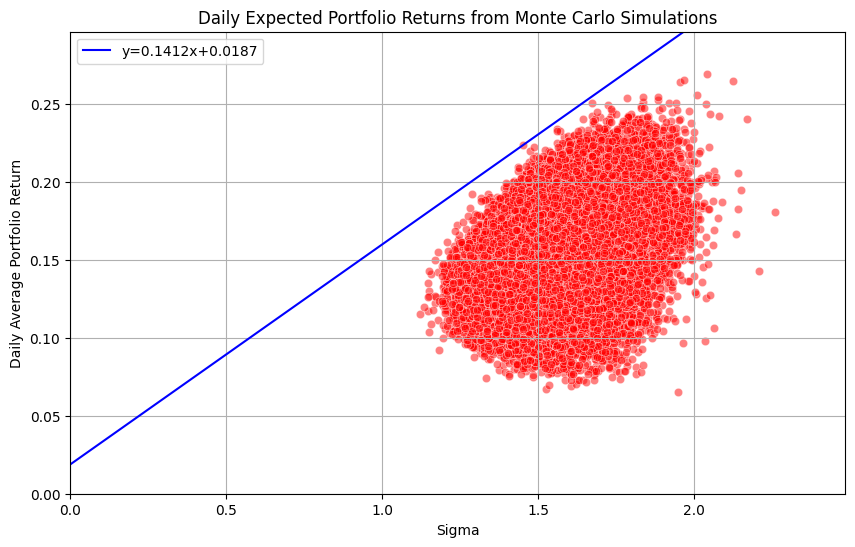

{'best_weights': array([0.04816508, 0.00233984, 0.24254225, 0.05616103, 0.03445151,
        0.08025317, 0.239296  , 0.26715215, 0.02599136, 0.00364762]),
 'best_return': 0.2235015926009266}

In [ ]:
def efficient_frontier(window=504, n = 10000):

  '''
  Inputs:
    expected_returns: np.array of expected returns correlating to df['Stock']
    weights: np.array of weights correlating to df['Expected Return']
    n: number of portfolios to generate, default = 10000

  Returns:
    best_weights: np.array of best weights
    best_return: float of best return
  '''


  best_return = 0
  best_weights = None
  portfolio_returns = []
  portfolio_weights = []
  portfolio_std = []
  best_sharpe_index = 0
  best_return = 0.0
  best_weights = np.array([])
  sharpe_ratio = []
  best_sharpe_index = 0


  # Getting current data
  stock_returns = get_stock_returns(window=window)

  risk_free_rate = ff_cleaned_data[-(window):]['RF'].mean()
  expected_returns = stock_returns.mean()
  cov_returns = stock_returns.cov()


  # each n defines a portfolio, each portfolio has
  # # sharpe, E(return), weights, and stdev that need to be calc/plotted

  for i in range(n):
    # get and save weights
    weights = get_weights()
    portfolio_weights.append(weights)

    # calculate return and std
    portfolio_return = get_portfolio_return(weights, expected_returns)
    portfolio_returns.append(portfolio_return)

    stdev = np.sqrt(np.dot(weights.T, np.dot(cov_returns, weights)))
    portfolio_std.append(stdev)

    sharpe_ratio.append((portfolio_return - risk_free_rate) / stdev)

    if sharpe_ratio[i] > sharpe_ratio[best_sharpe_index]:
       best_sharpe_index = i
       best_return = portfolio_return
       best_weights = weights
       best_stdev = stdev
       best_sharpe = sharpe_ratio[i]

  # Slope for CAL
  slope = best_sharpe # ((best_return - risk_free_rate )/ best_stdev)

  # prints
  print('*'*50)
  print('Efficient Frontier')
  print('*'*50)
  print(f'Ran {n} simulations\n')
  print(f'Best Return:\n{best_return}\n')
  print(f'Best Weights:\n{best_weights}\n')
  print(f'Best Sharpe Ratio (slope): ', round(slope, 5),'\n')
  print(f'Risk Free rate (intercept) {round(risk_free_rate, 5)}\n')


  print('*'*50)
  print('Best Portfolio Composition:\n')
  for i in range(len(portfolio_weights[best_sharpe_index])):
    print(stock_returns.columns[i], round(portfolio_weights[best_sharpe_index][i], 5))
  print('*'*50)


  # plot
  plt.figure(figsize=(10,6))
  sns.scatterplot(x=portfolio_std, y=portfolio_returns, color='red', alpha=0.5)
  plt.xlabel('Sigma')
  plt.ylabel('Daily Average Portfolio Return')
  plt.title('Daily Expected Portfolio Returns from Monte Carlo Simulations')


  # plotting CAL
  x_line = np.linspace(0, 7, 1000)
  y_line = x_line * slope + risk_free_rate
  plt.plot(x_line, y_line, color='blue', label=f'y={round(slope, 4)}x+{round(risk_free_rate, 4)}')


  plt.xlim(0, np.max(portfolio_std )*1.1) # maybe change this ? idk bc we wanna be able to see (0,0)
  plt.ylim(0, np.max(portfolio_returns)*1.1) # maybe change this ? idk bc we wanna be able to see (0,0)
  plt.grid(True)
  plt.legend(loc='upper left')
  plt.show()


  return {'best_weights': portfolio_weights[best_sharpe_index], 'best_return': best_return}


efficient_frontier(window=504, n = 100000)

# 8. Attempt the CAPM and the 3 Factor Model on at least one stock with
1. lasso regression
2. ridge regression
3. elastic net regression
4. Discuss the differences between each approach and which you feel is most appropriate.


In [ ]:
## I had to redefine this to handle the 'COST UW ...' instead of 'COST US ...'

def process_stock_data(stock):

  stock_chosen = f'{stock} US Equity Closing Price' if stock != 'COST' else 'COST UW Equity Closing Price'
  stock_symbol = f'{stock} US Equity' if stock != 'COST' else 'COST UW Equity'

  chosen_stock_data = stock_data[[stock_symbol, stock_chosen]].copy()

  chosen_stock_data.columns = ['Date', f'{stock} Price']
  ## merge with FF factors
  chosen_stock_data = chosen_stock_data.merge(ff_cleaned_data, how = 'left', on = 'Date')

  ## filter data after 2000
  chosen_stock_data = chosen_stock_data[chosen_stock_data['Date'] >'2000-01-01']

  chosen_stock_data[f'{stock} Return'] = chosen_stock_data[f'{stock} Price'].pct_change()*100

  ## calculate excess returm
  chosen_stock_data[f'{stock} Excess Return'] = chosen_stock_data[f'{stock} Return'] - chosen_stock_data['RF'] # is this supposed to be *100?
  chosen_stock_data.dropna(inplace=True)
  return chosen_stock_data

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

stock = 'AAPL'
chosen_stock_data = process_stock_data(stock)

# Independent variables (Mkt-RF, SMB, HML) - Fama-French 3-Factor
X_ff3 = chosen_stock_data[['Mkt-RF', 'SMB', 'HML']]

# Dependent variable (Excess Return of the stock)
y = chosen_stock_data[f'{stock} Excess Return']

# CAPM: Only Market Excess Return
X_capm = chosen_stock_data[['Mkt-RF']]
X_capm = sm.add_constant(X_capm)  # Add constant

# Fama-French 3-Factor Model: Add constant to independent variables
X_ff3 = sm.add_constant(X_ff3)

# Split data into training and testing sets (80/20 split)
X_train_capm, X_test_capm, y_train, y_test = train_test_split(X_capm, y, test_size=0.2, random_state=42)
X_train_ff3, X_test_ff3, y_train_ff3, y_test_ff3 = train_test_split(X_ff3, y, test_size=0.2, random_state=42)

# Standardize the data for regularization
scaler = StandardScaler()
X_train_capm_scaled = scaler.fit_transform(X_train_capm)
X_test_capm_scaled = scaler.transform(X_test_capm)
X_train_ff3_scaled = scaler.fit_transform(X_train_ff3)
X_test_ff3_scaled = scaler.transform(X_test_ff3)

# Step 1: Apply Regularization on CAPM Model
# Lasso Regression (L1 regularization) on CAPM
lasso_capm = Lasso(alpha=0.1)
lasso_capm.fit(X_train_capm_scaled, y_train)
lasso_capm_pred = lasso_capm.predict(X_test_capm_scaled)

# Ridge Regression (L2 regularization) on CAPM
ridge_capm = Ridge(alpha=0.1)
ridge_capm.fit(X_train_capm_scaled, y_train)
ridge_capm_pred = ridge_capm.predict(X_test_capm_scaled)

# Elastic Net Regression (Combination of L1 and L2) on CAPM
elastic_net_capm = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_capm.fit(X_train_capm_scaled, y_train)
elastic_net_capm_pred = elastic_net_capm.predict(X_test_capm_scaled)

# Step 2: Apply Regularization on Fama-French 3-Factor Model
# Lasso Regression (L1 regularization) on FF3
lasso_ff3 = Lasso(alpha=0.1)
lasso_ff3.fit(X_train_ff3_scaled, y_train_ff3)
lasso_ff3_pred = lasso_ff3.predict(X_test_ff3_scaled)

# Ridge Regression (L2 regularization) on FF3
ridge_ff3 = Ridge(alpha=0.1)
ridge_ff3.fit(X_train_ff3_scaled, y_train_ff3)
ridge_ff3_pred = ridge_ff3.predict(X_test_ff3_scaled)

# Elastic Net Regression (Combination of L1 and L2) on FF3
elastic_net_ff3 = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_ff3.fit(X_train_ff3_scaled, y_train_ff3)
elastic_net_ff3_pred = elastic_net_ff3.predict(X_test_ff3_scaled)

# Results: Print Coefficients for CAPM and FF3 Model Regularization
print("CAPM Lasso Coefficients:", lasso_capm.coef_)
print("CAPM Ridge Coefficients:", ridge_capm.coef_)
print("CAPM Elastic Net Coefficients:", elastic_net_capm.coef_)

print("\nFF3 Lasso Coefficients:", lasso_ff3.coef_)
print("FF3 Ridge Coefficients:", ridge_ff3.coef_)
print("FF3 Elastic Net Coefficients:", elastic_net_ff3.coef_)

CAPM Lasso Coefficients: [0.         1.31287372]
CAPM Ridge Coefficients: [0.         1.41284525]
CAPM Elastic Net Coefficients: [0.         1.29797497]

FF3 Lasso Coefficients: [ 0.          1.32061138 -0.         -0.3095919 ]
FF3 Ridge Coefficients: [ 0.          1.42908575 -0.04297831 -0.41634168]
FF3 Elastic Net Coefficients: [ 0.          1.30611852 -0.         -0.34212351]


# 9. Use the top 20 companies in the S&P 500 by market cap to calculate the efficient frontier and find and label the tangent portfolio.

1. Give the optimal weights and describe which risk-free rate you used and why.

We are using a portfolio of the top 20 companies and are evaluating various portfolio returns with the following:


$$ E(R_{p}) = \sum \omega_i E(R_i) $$

$E(R_{p})$ = Expected return of the porfolio

$ \omega_i $ = weight of an asset, i

$ E(R_i) $ = Expected return of an asset, i

In [ ]:
stock_list = [
    'AAPL', 'MSFT', 'NVDA', 'GOOG', 'AMZN', 'META', 'BRK/B', 'LLY',
    'AVGO', 'TSLA', 'WMT', 'JPM', 'V', 'UNH', 'XOM', 'ORCL',
    'MA', 'HD', 'PG', 'COST'
]

In [ ]:
## I had to redefine this to handle the 'COST UW ...' instead of 'COST US ...'

def process_stock_data(stock):

  stock_chosen = f'{stock} US Equity Closing Price' if stock != 'COST' else 'COST UW Equity Closing Price'
  stock_symbol = f'{stock} US Equity' if stock != 'COST' else 'COST UW Equity'

  chosen_stock_data = stock_data[[stock_symbol, stock_chosen]].copy()

  chosen_stock_data.columns = ['Date', f'{stock} Price']
  ## merge with FF factors
  chosen_stock_data = chosen_stock_data.merge(ff_cleaned_data, how = 'left', on = 'Date')

  ## filter data after 2000
  chosen_stock_data = chosen_stock_data[chosen_stock_data['Date'] >'2000-01-01']

  chosen_stock_data[f'{stock} Return'] = chosen_stock_data[f'{stock} Price'].pct_change()*100

  ## calculate excess returm
  chosen_stock_data[f'{stock} Excess Return'] = chosen_stock_data[f'{stock} Return'] - chosen_stock_data['RF'] # is this supposed to be *100?
  chosen_stock_data.dropna(inplace=True)
  return chosen_stock_data

In [ ]:
def get_stock_returns(window=252):
  '''
  Returns a DataFrame of all 20 stock returns
  '''
  excess_returns_df = pd.DataFrame()
  return_dict = {}

  for stock in stock_list:
      stock_data_processed = process_stock_data(stock)[-window:]

      stock_excess_returns = stock_data_processed[['Date', f'{stock} Excess Return']].copy()
      stock_excess_returns.set_index('Date', inplace=True)

      stock_excess_returns = stock_excess_returns.rename(columns={f'{stock} Excess Return': stock})

      exp_returns = stock_data_processed[f'{stock} Excess Return'].mean()
      exp_std = stock_data_processed[f'{stock} Excess Return'].std()

      if excess_returns_df.empty:
          excess_returns_df = stock_excess_returns
      else:
          excess_returns_df = excess_returns_df.join(stock_excess_returns, how='outer')

  return excess_returns_df


In [ ]:
def get_portfolio_return(weights: np.array, asset_returns: np.array) -> float:
  '''
  Returns EV of a portfolio, given EV of assets and weights
  '''
  return weights.T @ asset_returns

In [ ]:
def get_weights(n = 20):
  '''
  Returns n (default=20) random numbers that sum to 1
  '''
  weights = np.random.rand(n)
  weights /= np.sum(weights)
  return weights

<ipython-input-30-c96001ec765f>:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  chosen_stock_data[f'{stock} Return'] = chosen_stock_data[f'{stock} Price'].pct_change()*100
<ipython-input-30-c96001ec765f>:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  chosen_stock_data[f'{stock} Return'] = chosen_stock_data[f'{stock} Price'].pct_change()*100
<ipython-input-30-c96001ec765f>:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None

**************************************************
Efficient Frontier
**************************************************
Ran 100000 simulations

Best Return:
0.15557849841114524

Best Weights:
[5.68831198e-03 6.29594421e-03 1.24576274e-01 8.65681583e-05
 2.97470295e-02 8.22681358e-02 1.13906089e-02 7.80517481e-02
 6.34959182e-02 9.27508352e-03 1.00716235e-01 1.33065410e-01
 1.24552651e-01 2.65247478e-02 9.02229065e-02 7.16491358e-04
 3.93288553e-04 1.65252838e-02 2.44945142e-02 7.19128489e-02]

Best Sharpe Ratio (slope):  0.1239 

Risk Free rate (intercept) 0.01869

**************************************************
Best Portfolio Composition:

AAPL 0.00569
MSFT 0.0063
NVDA 0.12458
GOOG 9e-05
AMZN 0.02975
META 0.08227
BRK/B 0.01139
LLY 0.07805
AVGO 0.0635
TSLA 0.00928
WMT 0.10072
JPM 0.13307
V 0.12455
UNH 0.02652
XOM 0.09022
ORCL 0.00072
MA 0.00039
HD 0.01653
PG 0.02449
COST 0.07191
**************************************************


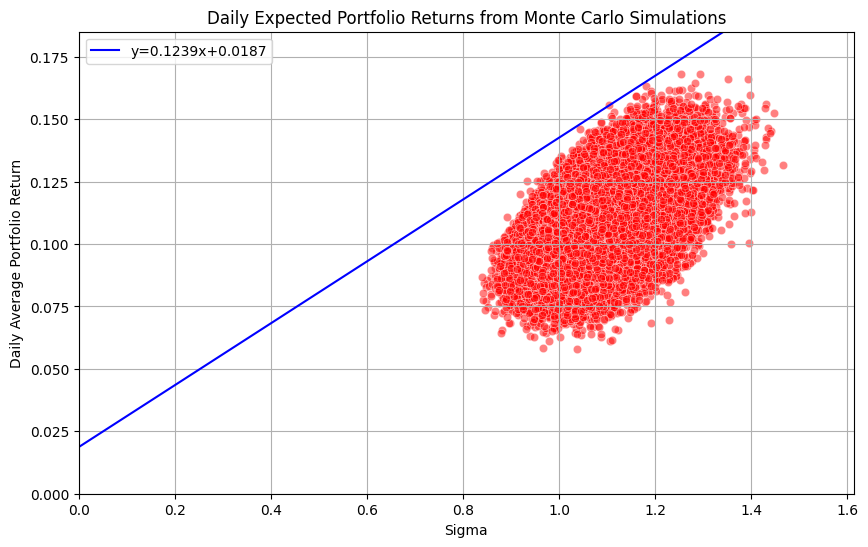

{'best_weights': array([5.68831198e-03, 6.29594421e-03, 1.24576274e-01, 8.65681583e-05,
        2.97470295e-02, 8.22681358e-02, 1.13906089e-02, 7.80517481e-02,
        6.34959182e-02, 9.27508352e-03, 1.00716235e-01, 1.33065410e-01,
        1.24552651e-01, 2.65247478e-02, 9.02229065e-02, 7.16491358e-04,
        3.93288553e-04, 1.65252838e-02, 2.44945142e-02, 7.19128489e-02]),
 'best_return': 0.15557849841114524}

In [ ]:
def efficient_frontier(window=500, n = 10000):

  '''
  Inputs:
    expected_returns: np.array of expected returns correlating to df['Stock']
    weights: np.array of weights correlating to df['Expected Return']
    n: number of portfolios to generate, default = 10000

  Returns:
    best_weights: np.array of best weights
    best_return: float of best return
  '''


  best_return = 0
  best_weights = None
  portfolio_returns = []
  portfolio_weights = []
  portfolio_std = []
  best_sharpe_index = 0
  best_return = 0.0
  best_weights = np.array([])
  sharpe_ratio = []
  best_sharpe_index = 0


  # Getting current data
  stock_returns = get_stock_returns(window=window)

  risk_free_rate = ff_cleaned_data[-(window):]['RF'].mean()
  expected_returns = stock_returns.mean()
  cov_returns = stock_returns.cov()


  # each n defines a portfolio, each portfolio has
  # # sharpe, E(return), weights, and stdev that need to be calc/plotted

  for i in range(n):
    # get and save weights
    weights = get_weights()
    portfolio_weights.append(weights)

    # calculate return and std
    portfolio_return = get_portfolio_return(weights, expected_returns)
    portfolio_returns.append(portfolio_return)

    stdev = np.sqrt(np.dot(weights.T, np.dot(cov_returns, weights)))
    portfolio_std.append(stdev)

    sharpe_ratio.append((portfolio_return - risk_free_rate) / stdev)

    if sharpe_ratio[i] > sharpe_ratio[best_sharpe_index]:
       best_sharpe_index = i
       best_return = portfolio_return
       best_weights = weights
       best_stdev = stdev
       best_sharpe = sharpe_ratio[i]

  # Slope for CAL
  slope = best_sharpe # ((best_return - risk_free_rate )/ best_stdev)

  # prints
  print('*'*50)
  print('Efficient Frontier')
  print('*'*50)
  print(f'Ran {n} simulations\n')
  print(f'Best Return:\n{best_return}\n')
  print(f'Best Weights:\n{best_weights}\n')
  print(f'Best Sharpe Ratio (slope): ', round(slope, 5),'\n')
  print(f'Risk Free rate (intercept) {round(risk_free_rate, 5)}\n')


  print('*'*50)
  print('Best Portfolio Composition:\n')
  for i in range(len(portfolio_weights[best_sharpe_index])):
    print(stock_returns.columns[i], round(portfolio_weights[best_sharpe_index][i], 5))
  print('*'*50)


  # plot
  plt.figure(figsize=(10,6))
  sns.scatterplot(x=portfolio_std, y=portfolio_returns, color='red', alpha=0.5)
  plt.xlabel('Sigma')
  plt.ylabel('Daily Average Portfolio Return')
  plt.title('Daily Expected Portfolio Returns from Monte Carlo Simulations')


  # plotting CAL
  x_line = np.linspace(0, 7, 1000)
  y_line = x_line * slope + risk_free_rate
  plt.plot(x_line, y_line, color='blue', label=f'y={round(slope, 4)}x+{round(risk_free_rate, 4)}')


  plt.xlim(0, np.max(portfolio_std )*1.1) # maybe change this ? idk bc we wanna be able to see (0,0)
  plt.ylim(0, np.max(portfolio_returns)*1.1) # maybe change this ? idk bc we wanna be able to see (0,0)
  plt.grid(True)
  plt.legend(loc='upper left')
  plt.show()


  return {'best_weights': portfolio_weights[best_sharpe_index], 'best_return': best_return}


efficient_frontier(window=504, n = 100000)